In [1]:
%matplotlib inline


===================================================================
Determining and plotting the altitude/azimuth of Centarus A (Cen A), with respect to ARA
===================================================================

This notebook is based on an Astropy example: https://docs.astropy.org/en/stable/generated/examples/coordinates/plot_obs-planning.html

We first make a `~astropy.coordinates.SkyCoord` instance for Cen A.
The altitude-azimuth coordinates are then found using
`astropy.coordinates.EarthLocation` and `astropy.time.Time` objects.


*By: Jorge Torres (torresespinosa.1@osu.edu)*





Let's first import useful python modules


In [2]:
import numpy as np #math stuff
import matplotlib.pyplot as plt #plotting stuff
from astropy.visualization import astropy_mpl_style, quantity_support #astropy utilities
plt.style.use(astropy_mpl_style)
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2b226f75cd30>

Import the packages necessary for finding coordinates and making
coordinate transformations



In [3]:
import astropy.units as u #astropy's units module
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

`astropy.coordinates.SkyCoord.from_name` uses the SIMBAD Astronomical Database to resolve object
names and retrieve coordinates.

Get the coordinates of Cen A:

In [4]:
CenA = SkyCoord.from_name('Cen A')

Use `astropy.coordinates.EarthLocation` to provide the South Pole's location at a given time. For this example we use the whole year of 2015.



In [5]:
south_pole = EarthLocation(lat=-90.0*u.deg, lon=45*u.deg, height=3*u.m)
utcoffset = -0*u.hour  # No UTC offset, as the South Pole uses UTC
time = Time('2015-1-01 00:00:00') - utcoffset

Use `astropy.coordinates` to find the Alt, Az coordinates of Cen A at as
observed from the South Pole on the first day of 2015.

In [6]:
CenAaltaz = CenA.transform_to(AltAz(obstime=time,location=south_pole))
print("Cen A's Altitude = {0.alt:.2}".format(CenAaltaz))

Cen A's Altitude = 4.3e+01 deg


Find the alt,az coordinates of Cen A at 365*5 times evenly spaced between Jan 1st and Dec 31, 2015



In [28]:
endtime = Time('2020-12-31 23:00:00') - utcoffset
delta_endtime = np.linspace(0, 365*6, 365*6)*u.day
frame_endtime = AltAz(obstime=endtime+delta_endtime,
                          location=south_pole)
CenAaltazs_endtime = CenA.transform_to(frame_endtime)

Use  `~astropy.coordinates.get_sun` to find the location of the Sun at 365*5
evenly spaced times between Jan 1st and Dec 31, 2015:



In [29]:
from astropy.coordinates import get_sun
delta_endtime = np.linspace(0, 365*6, 365*6)*u.day
timestimeRange = endtime + delta_endtime
frametimeRange = AltAz(obstime=timestimeRange, location=south_pole)
sunaltazstimeRange = get_sun(timestimeRange).transform_to(frametimeRange)

Do the same with `~astropy.coordinates.get_moon` to find when the moon is
up. Be aware that this will need to download a 10MB file from the internet
to get a precise location of the moon.



In [30]:
from astropy.coordinates import get_moon
moontimeRange = get_moon(timestimeRange)
moonaltazstimeRange = moontimeRange.transform_to(frametimeRange)

Find the alt,az coordinates of Cen A at those same times:



In [31]:
CenAaltazstimeRange = CenA.transform_to(frametimeRange)

Make a figure illustrating the altitudes of Cen A, the Sun and the Moon, as well as when the night starts at the South Pole, over that time:



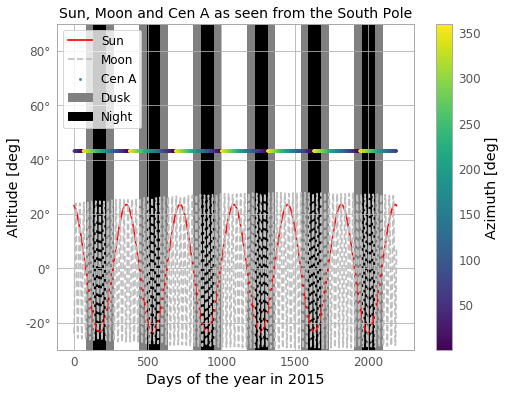

In [32]:
plt.plot(delta_endtime, sunaltazstimeRange.alt, color='r', label='Sun')
plt.plot(delta_endtime, moonaltazstimeRange.alt, color=[0.75]*3, ls='--', label='Moon')
plt.scatter(delta_endtime, CenAaltazstimeRange.alt,
            c=CenAaltazstimeRange.az, label='Cen A', lw=0, s=8,
            cmap='viridis')
plt.fill_between(delta_endtime, -30*u.deg, 90*u.deg,
                 sunaltazstimeRange.alt < -0*u.deg, color='0.5', zorder=0, label="Dusk")
plt.fill_between(delta_endtime, -30*u.deg, 90*u.deg,
                 sunaltazstimeRange.alt < -18*u.deg, color='k', zorder=0, label="Night")
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')
# plt.xlim(0*u.day, 365*u.day)
# plt.xticks((np.arange(13)*2-12)*u.hour)
plt.ylim(-30*u.deg, 90*u.deg)
plt.xlabel('Days of the year in 2015')
plt.ylabel('Altitude [deg]')
plt.title("Sun, Moon and Cen A as seen from the South Pole", fontsize=14)
plt.savefig("CenA_plus_MS.png",dpi=200)

Make a zoomed version of the altitude as a function of time for Cen A

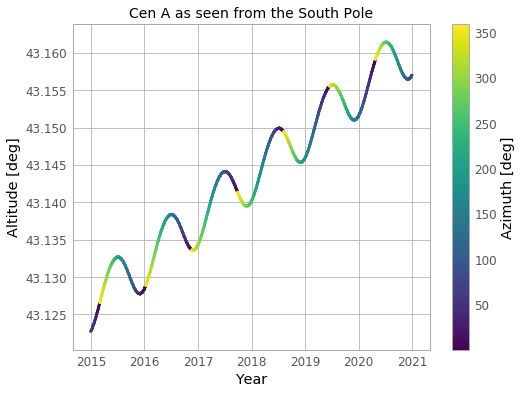

In [76]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter


plt.scatter(dates, CenAaltazstimeRange.alt,
            c=CenAaltazstimeRange.az, label='Cen A', lw=0, s=8,
            cmap='viridis')
plt.colorbar().set_label('Azimuth [deg]')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}')) 
dates = np.arange(datetime.datetime(2015, 1,1), datetime.datetime(2020, 12,30), datetime.timedelta(days=1)) #create manual entry for dates
# plt.yticks(np.arange(43.09, 43.12, step=0.01)*u.deg)
plt.xlabel('Year')
plt.ylabel('Altitude [deg]')
plt.title("Cen A as seen from the South Pole", fontsize=14)
plt.savefig("CenA_alt_2020.png",dpi=200)

Notice that it barely moves wrt to ARA!

Now make a plot of the azimuth angle (phi angle for theta) as a function of time. We expect this to oscillate, with a period of 1 day as the Earth rotates

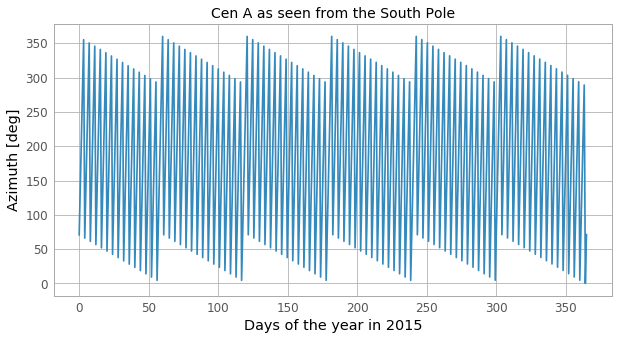

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
plt.plot(delta_endtime[::4],CenAaltazstimeRange.az[::4]) #I'm plotting every 4 points, as the plot gets really busy
plt.xlabel('Days of the year in 2015')
plt.ylabel('Azimuth [deg]')
plt.title("Cen A as seen from the South Pole", fontsize=14)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 
# plt.xlim(0,30)
plt.savefig("CenA_az.png",dpi=200)